하나의 DataFrame 만들기 
-> DB Insert 
-> 1년 동안 승,하차 집계 -> 서울시 위에 히트맵 
-> 강남 승,하차 시각화 

In [734]:
import requests
import pandas as pd
import numpy as np
file1 = pd.read_csv("./Subway_201602.csv",encoding='cp949')
# 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte ==>한글을 못읽어오므
# encoding "cp949" or "euc-kr"
file1
# ['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
#        '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
#        '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
#        '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
#        '01 ~ 02', '02 ~ 03', '03 ~ 04'],
file_colums=[] #12개, 컬럼명 리스트
file_list=[] # 12개 각각 csv파일 리스트저장
for i in range(1,13): #1~12
    if i<10:
        if i<=5: #컬럼명이 1~5까지가 같고
            temp=str(0)+str(i)
            file=pd.read_csv(f"./Subway_2016{temp}.csv",encoding='cp949')
            # print(file["할인"].value_counts().count)
            file.drop(['할인','02 ~ 03','03 ~ 04'],axis=1,inplace=True)
            file=file[['역명', '날짜', '호선', '구 분',  '05 ~ 06', '06 ~ 07', '07 ~ 08',
        '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
        '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01', '01 ~ 02','04 ~ 05']]
            file.columns=['역명', '날짜', '호선', '구분',  '05~06', '06~07', '07~08',
        '08~09', '09~10', '10~11', '11~12', '12~13', '13~14',
        '14~15', '15~16', '16~17', '17~18', '18~19', '19~20',
        '20~21', '21~22', '22~23', '23~24', '00~01', '01~02','04~05']
           #구분변수가 12개이므로 이거를 합해준다, 역명 날짜 호선으로
              # ['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
        # '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
        # '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02', '04~05']
            new_file=file.groupby(["역명","날짜","구분"]).sum().copy()
            new_file.drop(["호선"],axis=1,inplace=True)
            new_file.reset_index(inplace=True)
            file_colums.append(new_file.columns)
            file_list.append(new_file)
        else: #6~12까지 같음
            temp=str(0)+str(i)
            file=pd.read_csv(f"./Subway_2016{temp}.csv",encoding='cp949')
            file["04~05"]= 0
            # file.drop(['할인'],axis=1,inplace=True)
            file_colums.append(file.columns) 
            file_list.append(file)
        # print(file)
        # print(file.columns)
        # new_file=file.groupby(["날짜", '구 분'])
        # print(new_file)
        # break
    else:
        # print(str(i))
        temp=str(i)
        file=pd.read_csv(f"./Subway_2016{temp}.csv",encoding='cp949')
        file["04~05"]= 0
        file.columns=['역명', '날짜', '구분',  '05~06', '06~07', '07~08',
        '08~09', '09~10', '10~11', '11~12', '12~13', '13~14',
        '14~15', '15~16', '16~17', '17~18', '18~19', '19~20',
        '20~21', '21~22', '22~23', '23~24', '00~01', '01~02','04~05']
        file_colums.append(file.columns)
        # print(file_colums)
        file_list.append(file)

In [325]:
# a = pd.DataFrame(file_list[0]) =>완벽한 데이터프레임 모양의 리스트를 데이터프레임으로 바꾸는법

In [735]:
for i in range(len(file_list)):
    print(len(file_list[i].columns))

25
25
25
25
25
25
25
25
25
25
25
25


In [736]:
total_subway=pd.DataFrame()
# type(total_subway)
for i in range(len(file_list)):
    a=pd.DataFrame(file_list[i])
    total_subway=pd.concat([total_subway,a])

In [737]:
total_subway

,역명,날짜,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,04~05
0,가락시장(340),2016-01-01,승차,72,102,78,145,165,173,226,...,253,230,124,166,165,138,35,2,0,0
1,가락시장(340),2016-01-01,하차,6,81,65,116,121,143,167,...,237,206,181,151,134,153,151,15,0,0
2,가락시장(340),2016-01-02,승차,45,66,113,288,341,334,463,...,373,299,226,236,205,172,60,0,0,0
3,가락시장(340),2016-01-02,하차,11,81,83,181,224,195,310,...,523,393,346,268,269,234,202,28,0,0
4,가락시장(340),2016-01-03,승차,47,72,81,198,252,256,277,...,329,294,191,204,178,139,52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,남태령(434),2016-12-29,하차,2,26,189,238,68,64,30,...,57,67,78,36,50,39,24,17,0,0
7374,남태령(434),2016-12-30,승차,18,23,125,165,111,80,61,...,162,275,164,41,29,22,10,1,0,0
7375,남태령(434),2016-12-30,하차,4,39,75,154,61,30,20,...,66,81,59,47,30,34,25,14,0,0
7376,남태령(434),2016-12-31,승차,16,22,19,93,81,71,60,...,246,307,36,15,24,10,9,0,0,0


In [738]:
total_subway.columns

Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02', '04~05'],
      dtype='object')

In [739]:
subway_station = total_subway['역명'].unique()

In [740]:
subway_station #전체 지하철역

array(['가락시장(340)', '강남(222)', '강변(214)', '건대입구(212)', '경복궁(317)',
       '경찰병원(341)', '고속터미널(329)', '교대(223)', '교대(330)', '구로디지털단지(232)',
       '구의(213)', '구파발(310)', '금호(324)', '길음(417)', '낙성대(227)',
       '남부터미널(331)', '남태령(434)', '노원(411)', '녹번(313)', '당고개(409)',
       '당산(237)', '대림(233)', '대청(337)', '대치(335)', '도곡(334)', '도림천(247)',
       '독립문(316)', '동대문(155)', '동대문(421)', '동대문역사문화공원(205)',
       '동대문역사문화공원(422)', '동대입구(322)', '동묘앞(159)', '동작(431)', '뚝섬(210)',
       '매봉(333)', '명동(424)', '무악재(315)', '문래(235)', '미아(415)',
       '미아사거리(416)', '방배(225)', '봉천(229)', '불광(312)', '사당(226)',
       '사당(433)', '삼각지(428)', '삼성(219)', '상계(410)', '상왕십리(207)',
       '서울대입구(228)', '서울역(150)', '서울역(426)', '서초(224)', '선릉(220)',
       '성수(211)', '성신여대입구(418)', '수서(339)', '수유(강북구청)(414)', '숙대입구(427)',
       '시청(151)', '시청(201)', '신답(245)', '신당(206)', '신대방(231)', '신도림(234)',
       '신림(230)', '신사(327)', '신설동(156)', '신설동(246)', '신용산(429)',
       '신정네거리(249)', '신천(217)', '신촌(240)', '쌍문(41

In [741]:
len(subway_station) #119개

119

In [330]:
pip install osmnx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [545]:
#도로명주소 받아서 위도경도로 return 해준다
from geopy.geocoders import Nominatim
import osmnx as ox 
geolocoder = Nominatim(user_agent = 'South Korea')
def geocoding(address): 
    geo = geolocoder.geocode(address)
    crd = (geo.latitude, geo.longitude)
    # print(crd)
    return crd

# address_list = "가락시장역"
# subway_station 모든 유티크한 역 다있음

demo = dict()
# crd = geocoding(address_list)
# # (43.0542733, 2.512471457499548)

In [742]:
geo_subway=[] #전체 지하철역명 
for i in range(len(subway_station)):
    # geocoding(total_subway[i]+"역")
    print(subway_station[i].split("(")[0]+"역")
    geo_subway.append(subway_station[i].split("(")[0]+"역")

가락시장역
강남역
강변역
건대입구역
경복궁역
경찰병원역
고속터미널역
교대역
교대역
구로디지털단지역
구의역
구파발역
금호역
길음역
낙성대역
남부터미널역
남태령역
노원역
녹번역
당고개역
당산역
대림역
대청역
대치역
도곡역
도림천역
독립문역
동대문역
동대문역
동대문역사문화공원역
동대문역사문화공원역
동대입구역
동묘앞역
동작역
뚝섬역
매봉역
명동역
무악재역
문래역
미아역
미아사거리역
방배역
봉천역
불광역
사당역
사당역
삼각지역
삼성역
상계역
상왕십리역
서울대입구역
서울역역
서울역역
서초역
선릉역
성수역
성신여대입구역
수서역
수유역
숙대입구역
시청역
시청역
신답역
신당역
신대방역
신도림역
신림역
신사역
신설동역
신설동역
신용산역
신정네거리역
신천역
신촌역
쌍문역
아현역
안국역
압구정역
약수역
양재역
양천구청역
역삼역
연신내역
영등포구청역
오금역
옥수역
왕십리역
용답역
용두역
을지로3가역
을지로3가역
을지로4가역
을지로입구역
이대역
이촌역
일원역
잠실역
잠실나루역
잠원역
제기동역
종각역
종로3가역
종로3가역
종로5가역
종합운동장역
지축역
창동역
청량리역
총신대입구역
충무로역
충정로역
학여울역
한성대입구역
한양대역
합정역
혜화역
홍대입구역
홍제역
회현역


In [743]:
len(geo_subway)

119

In [ ]:
from tqdm import tqdm

In [744]:
geo_lat_lot=[] #열차역 이름+위경도 딕셔너리형태 겹치는거 다 제외하면
for i in range(len(geo_subway)):
    if geo_subway[i]=="구의역":
        geo_lat_lot.append((37.543401094637, 127.09026614257))
        # geo_lat_lot.append((37.543401094637, 127.09026614257))
    elif geo_subway[i]=="교대역":
        geo_lat_lot.append((37.4929876, 127.0138296))
        # geo_lat_lot.append(( 37.4929876, 127.0138296))
    elif geo_subway[i]=="동대문역사문화공원역":
        geo_lat_lot.append((37.5651111, 127.0077872))
        # geo_lat_lot.append(( 37.5651111, 127.0077872))
    elif geo_subway[i]=="영등포구청역":
        geo_lat_lot.append((37.52497, 126.895951))
        # geo_lat_lot.append(( 37.52497, 126.895951))    
    else:
        try:
            geo_lat_lot.append(geocoding(geo_subway[i]))
            
        except:
            pass
            # print(geo_subway[i])
            
        
   
    

In [745]:
len(geo_lat_lot)

119

In [746]:
geo_lat_lot

[(37.4925106, 127.1185729),
 (37.5002114, 127.0267345),
 (37.53553, 127.09376),
 (37.54088, 127.06812),
 (37.5758575, 126.9712915),
 (37.4950525, 127.1236964),
 (37.5050827, 127.0049777),
 (37.4929876, 127.0138296),
 (37.4929876, 127.0138296),
 (37.4836694, 126.902802),
 (37.543401094637, 127.09026614257),
 (37.6376259, 126.9183928),
 (35.93078165, 128.8658392214778),
 (37.60171, 127.02421),
 (37.4764008, 126.9648789),
 (37.4849864, 127.0166067),
 (37.4656799, 126.9881726),
 (37.6563651, 127.0634799),
 (37.601116, 126.9330652),
 (37.670098, 127.0789245),
 (37.5330102, 126.9013961),
 (37.4911154, 126.8939942),
 (37.4932234, 127.0796706),
 (37.4946573, 127.0644438),
 (37.4912867, 127.0557518),
 (37.5138748, 126.8839602),
 (37.5737078, 126.9584807),
 (37.5718616, 127.0114887),
 (37.5718616, 127.0114887),
 (37.5651111, 127.0077872),
 (37.5651111, 127.0077872),
 (37.5590692, 127.0066557),
 (37.5735084, 127.0174344),
 (37.5032514, 126.9759981),
 (37.5477135, 127.0463309),
 (37.4860153, 127.0

In [747]:
total_subway.head(1)

,역명,날짜,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,04~05
0,가락시장(340),2016-01-01,승차,72,102,78,145,165,173,226,...,253,230,124,166,165,138,35,2,0,0


In [748]:
new_total_subway=total_subway.groupby(["역명"]).sum().reset_index()

In [749]:
new_total_subway

,역명,날짜,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,04~05
0,가락시장(340),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,40974,163385,398189,632286,392997,312079,321725,...,451415,592528,456004,319498,292647,268593,153197,38955,763,79
1,강남(222),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,354846,1100982,2797618,5197647,4929856,2982109,2934301,...,5198254,7515481,5857055,3846854,4175810,4218029,2057480,424067,5185,1558
2,강변(214),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,188569,868379,1828187,2711045,2144760,1857176,1808904,...,2555270,3056422,2722565,2048152,1850141,1593816,812846,170977,2810,179
3,건대입구(212),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,304957,582505,1242513,2356139,1629975,1235748,1257565,...,2555245,3470987,3074276,2251035,2256229,2240204,1406128,346829,18191,2426
4,경복궁(317),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,56735,265446,832675,1950182,1283043,978981,987923,...,1401508,1980457,1143494,809029,825940,650210,286889,56884,1087,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,합정(238),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,178441,471338,1137228,1958263,1428034,965782,935906,...,1694773,2589523,2185660,1431723,1457872,1432954,861121,194455,6483,293
115,혜화(420),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,89007,361210,908235,1941781,1735124,1491663,1495434,...,2601255,3087714,2332534,1557696,1818582,1821209,870578,163591,1689,140
116,홍대입구(239),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,608717,743400,1515383,2784334,2463665,1962300,2147861,...,4506877,5743320,4978778,3689913,3821536,3949621,2474071,501941,35014,8929
117,홍제(314),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,149692,408892,1056273,1431067,969826,725237,669495,...,941611,1177327,1011497,678902,614680,576823,343285,87511,692,188


In [750]:
# new_total_subway["합계"]=new_total_subway.sum(axis=1)
# '05~06', '06~07', '07~08',
#         '08~09', '09~10', '10~11', '11~12', '12~13', '13~14',
#         '14~15', '15~16', '16~17', '17~18', '18~19', '19~20',
#         '20~21', '21~22', '22~23', '23~24', '00~01', '01~02','04~05'
new_total_subway.loc[:,"합계"]=new_total_subway.loc[:,'05~06' : '04~05'].sum(axis=1)

In [751]:
new_total_subway.합계

0       6592849
1      72991478
2      36523852
3      34950344
4      19243469
         ...   
114    24807297
115    32442615
116    57967957
117    14563593
118    22568201
Name: 합계, Length: 119, dtype: int64

In [752]:
# geo_lat_lot[0][1]

In [753]:
for i in range(len(geo_lat_lot)):
    new_total_subway.loc[i,"위도"]=geo_lat_lot[i][0]
    new_total_subway.loc[i,"경도"]=geo_lat_lot[i][1]
    # break

In [557]:
from geopy.geocoders import Nominatim
# 위경도입력하면 주소나옴
def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)
    return address

# address = geocoding_reverse(lat_lng_str) #위도 경도 들어가기
# print(address)

In [754]:
type('37.4925106,127.1185729')

str

In [755]:
type(str(geocoding_reverse('37.4925106,127.1185729')))

str

In [756]:
for i in tqdm(range(len(new_total_subway))):
    address=str(new_total_subway.loc[i,"위도"])+","+str(new_total_subway.loc[i,"경도"])
    # print(address)
    # print(geocoding_reverse(address))
    new_total_subway.loc[i,"주소"]=str(geocoding_reverse(address))
    # break
    # try:
    #     new_total_subway.loc[i,"주소"] = geocoding_reverse(address)
    # except:
    #     print(address)
    
# len(new_total_subway)

100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [01:42<00:00,  1.16it/s]


In [757]:
gugun= ["강남구",
"중구",
"서초구",
"영등포구",
"종로구",
"마포구",
"송파구",
"강서구",
"용산구",
"서대문구",
"광진구",
"양천구",
"강동구",
"성북구",
"구로구",
"은평구",
"노원구",
"성동구",
"동대문구",
"금천구",
"관악구",
"동작구",
"중랑구",
"도봉구",
"강북구"]

In [758]:
len(gugun)

25

In [759]:
# # 구군찾는 함수

#  for x in range(len(new_total_subway.loc[1,"주소"].split(", "))):
#     if new_total_subway.loc[1,"주소"].split(", ")[x] in gugun:
#         print(new_total_subway.loc[1,"주소"].split(", ")[x])
#         break


In [760]:
a=[]
for i in range(len(new_total_subway)):
    for x in range(len(new_total_subway.loc[i,"주소"].split(", "))):
        # print(len(new_total_subway.loc[i,"주소"].split(", ")))
        if new_total_subway.loc[i,"주소"].split(", ")[x] in gugun:
            # print(new_total_subway.loc[i,"주소"].split(", ")[x])
            new_total_subway.loc[i,"구군"]=new_total_subway.loc[i,"주소"].split(", ")[x]
        # else:
            # print("1111")
            # print(new_total_subway.loc[i,"주소"].split(", ")[x])
            # a.append(new_total_subway.loc[i,"주소"].split(", ")[x])


In [761]:
len(new_total_subway)

119

In [762]:
# new_total_subway.columns

In [763]:
# new_total_subway.isnull().sum()

In [764]:
new_total_subway = new_total_subway.dropna(axis=0)

In [765]:
new_total_subway.isnull().sum()

역명       0
날짜       0
구분       0
05~06    0
06~07    0
07~08    0
08~09    0
09~10    0
10~11    0
11~12    0
12~13    0
13~14    0
14~15    0
15~16    0
16~17    0
17~18    0
18~19    0
19~20    0
20~21    0
21~22    0
22~23    0
23~24    0
00~01    0
01~02    0
04~05    0
합계       0
위도       0
경도       0
주소       0
구군       0
dtype: int64

In [766]:
len(new_total_subway) #결측치제거

112

In [767]:
# last_total_subway=new_total_subway[len(new_total_subway.구군)

In [768]:
# len(last_total_subway)

In [769]:
# last_total_subway

In [770]:
# new_total_subway.loc[12,"주소"]
# #12번째이상

In [771]:
# for i in range(len(new_total_subway)):
#     # if new_total_subway.loc[i,"구군"]:
#         # print("1")
#     print(new_total_subway.loc[i,"구군"])

In [772]:
# pd.set_option('display.max_rows', None)

In [773]:
# new_total_subway

In [774]:
new_total_subway.구군

0       송파구
1       강남구
2       광진구
3       광진구
4       종로구
       ... 
114     마포구
115     종로구
116     마포구
117    서대문구
118      중구
Name: 구군, Length: 112, dtype: object

In [775]:
# map

In [776]:
# new_total_subway.loc[0,]

In [777]:
# temp_df=new_total_subway[["합계","구군"]]

In [778]:
# temp_df

In [779]:
# map

In [780]:
# new_total_subway #119개맞다

In [781]:
# new_total_subway.columns

In [782]:
# type(new_total_subway.loc[1,"합계"])

In [783]:
# new_total_subway

In [784]:
# ?folium.Choropleth
json = new_total_subway.to_json(force_ascii=False, orient = 'records', indent=4)

In [785]:
# print(json)

In [786]:
# geo_str=new_total_subway[["위도","경도"]]

In [787]:
# geo_str

In [788]:
# copy_new_total_subway=new_total_subway[~new_total_subway.구군.isnull()]

In [789]:
# len(copy_new_total_subway)

In [790]:
# new_total_subway[new_total_subway.구군.isnull()].구군=" "
# new_total_subway.loc[,new_total_subway.구군.isnull()].구군=" "

In [791]:
# new_total_subway.columns

In [792]:
# new_total_subway.isnull().sum()

In [793]:
# geo히트맵을 하기 위해서 역명이랑 위도 경도만 변경 + 합계도 넣기
temp_json = new_total_subway[["구군","합계"]]

In [794]:
temp_json

,구군,합계
0,송파구,6592849
1,강남구,72991478
2,광진구,36523852
3,광진구,34950344
4,종로구,19243469
...,...,...
114,마포구,24807297
115,종로구,32442615
116,마포구,57967957
117,서대문구,14563593


In [795]:
# oriend에는 객체의 방향, split records index columns default는 colums
# indents는 객체 들여쓸때 띄어쓰기 
# 첫번째 인자는 저장할경로
new_total_subway_json = new_total_subway.to_json("./new_total_subway_json", orient = 'records', indent=4,force_ascii=False)

In [796]:
temp_json.isnull().sum()

구군    0
합계    0
dtype: int64

In [797]:
new_total_subway_json

In [798]:
# new_total_subway_json

In [799]:
lat_lot = new_total_subway[["구군","위도","경도"]]

In [800]:
lat_lot

,구군,위도,경도
0,송파구,37.492511,127.118573
1,강남구,37.500211,127.026735
2,광진구,37.535530,127.093760
3,광진구,37.540880,127.068120
4,종로구,37.575857,126.971292
...,...,...,...
114,마포구,37.551038,126.915742
115,종로구,37.583053,127.001909
116,마포구,37.557414,126.923773
117,서대문구,37.588748,126.944210


In [801]:
lat_lot_json =lat_lot.to_json("./lat_lot_json", orient = 'records', indent=4,force_ascii=False)

In [802]:
lat_lot.구군

0       송파구
1       강남구
2       광진구
3       광진구
4       종로구
       ... 
114     마포구
115     종로구
116     마포구
117    서대문구
118      중구
Name: 구군, Length: 112, dtype: object

In [803]:
feature_collection

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'구군': '송파구'},
   'geometry': {'type': 'Point', 'coordinates': [127.1185729, 37.4925106]},
   'id': '0'},
  {'type': 'Feature',
   'properties': {'구군': '강남구'},
   'geometry': {'type': 'Point', 'coordinates': [127.0267345, 37.5002114]},
   'id': '1'},
  {'type': 'Feature',
   'properties': {'구군': '광진구'},
   'geometry': {'type': 'Point', 'coordinates': [127.09376, 37.53553]},
   'id': '2'},
  {'type': 'Feature',
   'properties': {'구군': '광진구'},
   'geometry': {'type': 'Point', 'coordinates': [127.06812, 37.54088]},
   'id': '3'},
  {'type': 'Feature',
   'properties': {'구군': '종로구'},
   'geometry': {'type': 'Point', 'coordinates': [126.9712915, 37.5758575]},
   'id': '4'},
  {'type': 'Feature',
   'properties': {'구군': '송파구'},
   'geometry': {'type': 'Point', 'coordinates': [127.1236964, 37.4950525]},
   'id': '5'},
  {'type': 'Feature',
   'properties': {'구군': '서초구'},
   'geometry': {'type': 'Point', 'coordina

In [608]:
import json
#원하는대로 json파일만들어주기
def create_feature_collection(dataframe):
    feature_collection = {"type": "FeatureCollection", "features": []}
    
    for _, row in dataframe.iterrows():
        feature = {
            "type": "Feature",
            "properties": {"구군": row["구군"]},
            "geometry": {"type": "Point", "coordinates": [row["경도"], row["위도"]]}
        }
        feature_collection["features"].append(feature)
    
    return feature_collection

feature_collection = create_feature_collection(lat_lot)
# FeatureCollection을 JSON 형식으로 출력
# json_subway=json.dumps(feature_collection, indent=4,ensure_ascii = False )

print(json.dumps(feature_collection, indent=4,ensure_ascii=False)) #utf-8같은거

{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "구군": "송파구"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    127.1185729,
                    37.4925106
                ]
            }
        },
        {
            "type": "Feature",
            "properties": {
                "구군": "강남구"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    127.0267345,
                    37.5002114
                ]
            }
        },
        {
            "type": "Feature",
            "properties": {
                "구군": "광진구"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    127.09376,
                    37.53553
                ]
            }
        },
        {
        

In [804]:
# json_subway
type(feature_collection)

dict

In [610]:
# type(feature_collection)

In [805]:
# type(temp_json)

In [806]:
# temp_json

In [807]:
# temp_json.reset_index(drop=True,inplace=True)

In [808]:
# temp_json

In [809]:
# json

In [810]:
# new_total_subway_json

In [811]:
# temp_json

In [812]:
# if new_total_subway_json is None:
#     print("new_total_subway_json 변수에 None 값이 포함되어 있습니다.")
# else:
#     print("new_total_subway_json 변수에 None 값이 포함되어 있지 않습니다.")

In [813]:
new_total_subway_json

In [814]:
temp_json

,구군,합계
0,송파구,6592849
1,강남구,72991478
2,광진구,36523852
3,광진구,34950344
4,종로구,19243469
...,...,...
114,마포구,24807297
115,종로구,32442615
116,마포구,57967957
117,서대문구,14563593


In [815]:
type(temp_json.합계)

pandas.core.series.Series

In [816]:
print(temp_json.구군.dtype)

object


In [817]:
print(temp_json.head())
print(temp_json.info())

    구군        합계
0  송파구   6592849
1  강남구  72991478
2  광진구  36523852
3  광진구  34950344
4  종로구  19243469
<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구군      112 non-null    object
 1   합계      112 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.7+ KB
None


In [818]:
temp_json['합계'] = temp_json['합계'].astype(int)

/tmp/ipykernel_108/3514348989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_json['합계'] = temp_json['합계'].astype(int)


In [819]:
temp_json = temp_json.dropna(subset=['합계'])

In [820]:
temp_json.isnull().sum()

구군    0
합계    0
dtype: int64

In [822]:
map

In [833]:
m = folium.Choropleth(
    geo_data=feature_collection,
    data=temp_json,
    columns=['구군', '합계'],
    fill_color="PuRd",
    key_on="properties.구군"
).add_to(map)

In [834]:
map

In [835]:
# map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
# folium.Choropleth(
#     geo_data=feature_collection,
#     fill_color="PuRd",
#     key_on="feature.properties.구군"
# ).add_to(map)

In [836]:
# map

In [837]:
temp_json

,구군,합계
0,송파구,6592849
1,강남구,72991478
2,광진구,36523852
3,광진구,34950344
4,종로구,19243469
...,...,...
114,마포구,24807297
115,종로구,32442615
116,마포구,57967957
117,서대문구,14563593


In [838]:
temp_json.columns

Index(['구군', '합계'], dtype='object')

In [839]:
temp_json

,구군,합계
0,송파구,6592849
1,강남구,72991478
2,광진구,36523852
3,광진구,34950344
4,종로구,19243469
...,...,...
114,마포구,24807297
115,종로구,32442615
116,마포구,57967957
117,서대문구,14563593


In [840]:
# map

In [841]:
# map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
# m = folium.Choropleth(
#     geo_data=json.dumps(feature_collection, indent=4, ensure_ascii=False),  # JSON 형식의 GeoJSON 데이터
#     data=temp_json,  # 사용할 데이터
#     columns=['구군', '합계'],  # 사용할 데이터의 열 이름
#     fill_color="PuRd",  # 색상
#     key_on="feature.properties.구군"  # 데이터와 지도를 연결하는 키
# ).add_to(map)

In [842]:
map

In [843]:
for idx, row in new_total_subway[["역명","위도","경도"]].iterrows(): #series형태로들어감
    # break
    folium.Marker([row.위도,row.경도],popup=[row.역명]).add_to(map)

In [844]:
map

In [845]:
# map

In [846]:
# import folium
# map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
# m = folium.Choropleth(new_total_subway_json, 
#                   data = temp_json,
#                   # columns=['구군','합계'], #구지필요하지는 않다
#                   fill_color="PuRd", #색입히
#                   key_on="역명").add_to(map) #중요한
                  

In [847]:
# map

In [848]:
# total_subway

In [849]:
# data = total_subway.groupby(["역명"]).sum()

In [850]:
# data.columns

In [851]:
# data

In [852]:
# geocoding("구의역")

In [853]:
# total_subway

In [854]:
# for i in range(len(file_list)):
#     print(len(file_list[i]))

In [855]:
# # print(file_list[9][file_list[9].날짜=="2016-09-01"])
# for i in range(len(file_list)):
#     print(file_list[i].head(5))

In [856]:
# # print(file_list[0][file_list[0].날짜=="2016-01-01"])
# test_file=file_list[0]
# test_file[(test_file.날짜=="2016-01-02") & (test_file.구분=="승차") & (test_file.역명=="서울역(150)")]
# # test_file.groupby("호선").sum()
# # test_file.역명.value_counts()
# temp=test_file.groupby(["역명","날짜","구분"]).sum().copy()
# # temp=test_file.groupby(["호선"]).sum().copy()

In [857]:
# temp
# type(temp)
# temp.drop(["호선"],axis=1,inplace=True)
# print(temp.호선.iloc[1,])


In [858]:
# temp.reset_index(inplace=True)

In [859]:
# temp

In [860]:
# temp.columns

In [861]:
# test_file.loc[(test_file.역명=="가락시장(340)") & (test_file.날짜=="2016-01-01") & (test_file.구분=="승차")]

In [862]:
# test_file=file_list[10]
# test_file[test_file.날짜=="2016-09-01"]

In [863]:
# # file_list[1].loc[file_list[1]['호선'] == '4호선']
# # file_list[1].grouby("날짜","구분")            # grouped = df.groupby('학년')
# # for i in range(5):
# #     print(file_list[i]["04 ~ 05"].head(1)) #01~02 02~03 03~04 값이 없지만 04~05는 값이 있다
# for i in range(6,12):
#     print(file_list[i]["01~02"].head(1)) #01~02값이 있다

In [864]:
# # file1.columns
# file_colums

# 일반O         6902 
# 초등생O        6902
# 청소년O        6902
# 우대 O        6902
# 영어 일반O      5738
# 중국어 일반O     5336
# 일어 일반O      4112
# 중국어 어린이 O   2912
# 영어 어린이  O   2896
# 일어 어린이 O     998
# 대학생   O      446
# 중고생           4

In [865]:
# file_list[10].head(12)

In [866]:
# file_colums #날짜 호선 역명 시간

In [867]:
import pymysql

In [868]:
con =pymysql.connect(host='ip', user='id', password='pw', db='encore', charset='utf8')
cur = con.cursor()

In [869]:
cur.execute("show tables")

4

In [870]:
new_total_subway

,역명,날짜,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,22~23,23~24,00~01,01~02,04~05,합계,위도,경도,주소,구군
0,가락시장(340),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,40974,163385,398189,632286,392997,312079,321725,...,268593,153197,38955,763,79,6592849,37.492511,127.118573,"송파대로, 가락1동, 송파구, 서울특별시, 05833, 대한민국",송파구
1,강남(222),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,354846,1100982,2797618,5197647,4929856,2982109,2934301,...,4218029,2057480,424067,5185,1558,72991478,37.500211,127.026735,"강남역, 강남대로, 역삼1동, 강남구, 서울특별시, 06129, 대한민국",강남구
2,강변(214),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,188569,868379,1828187,2711045,2144760,1857176,1808904,...,1593816,812846,170977,2810,179,36523852,37.535530,127.093760,"강변역, 강변역로4길, 구의3동, 광진구, 서울특별시, 05116, 대한민국",광진구
3,건대입구(212),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,304957,582505,1242513,2356139,1629975,1235748,1257565,...,2240204,1406128,346829,18191,2426,34950344,37.540880,127.068120,"건대입구역, 아차산로, 화양동, 광진구, 서울특별시, 05073, 대한민국",광진구
4,경복궁(317),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,56735,265446,832675,1950182,1283043,978981,987923,...,650210,286889,56884,1087,161,19243469,37.575857,126.971292,"경복궁역, 사직로, 내자동, 서울 도심, 사직동, 종로구, 서울특별시, 03169,...",종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,합정(238),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,178441,471338,1137228,1958263,1428034,965782,935906,...,1432954,861121,194455,6483,293,24807297,37.551038,126.915742,"합정역, 양화로, 서교동, 마포구, 서울특별시, 04045, 대한민국",마포구
115,혜화(420),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,89007,361210,908235,1941781,1735124,1491663,1495434,...,1821209,870578,163591,1689,140,32442615,37.583053,127.001909,"혜화역 1번출구, 동숭길, 대학로거리, 이화동, 종로구, 서울특별시, 03086, ...",종로구
116,홍대입구(239),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,608717,743400,1515383,2784334,2463665,1962300,2147861,...,3949621,2474071,501941,35014,8929,57967957,37.557414,126.923773,"홍대입구역, 양화로18길, 동교동, 서교동, 마포구, 서울특별시, 03995, 대한민국",마포구
117,홍제(314),2016-01-012016-01-012016-01-022016-01-022016-0...,승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차하차승차...,149692,408892,1056273,1431067,969826,725237,669495,...,576823,343285,87511,692,188,14563593,37.588748,126.944210,"홍제역, 통일로, 홍제3동, 서대문구, 서울특별시, 03646, 대한민국",서대문구


In [871]:
new_total_subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 118
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역명      112 non-null    object 
 1   날짜      112 non-null    object 
 2   구분      112 non-null    object 
 3   05~06   112 non-null    int64  
 4   06~07   112 non-null    int64  
 5   07~08   112 non-null    int64  
 6   08~09   112 non-null    int64  
 7   09~10   112 non-null    int64  
 8   10~11   112 non-null    int64  
 9   11~12   112 non-null    int64  
 10  12~13   112 non-null    int64  
 11  13~14   112 non-null    int64  
 12  14~15   112 non-null    int64  
 13  15~16   112 non-null    int64  
 14  16~17   112 non-null    int64  
 15  17~18   112 non-null    int64  
 16  18~19   112 non-null    int64  
 17  19~20   112 non-null    int64  
 18  20~21   112 non-null    int64  
 19  21~22   112 non-null    int64  
 20  22~23   112 non-null    int64  
 21  23~24   112 non-null    int64  
 22  00~01  

In [872]:
sql_new_total_subway=new_total_subway[["역명","합계","위도","경도","구군"]]

In [873]:
sql_new_total_subway.loc[0]

역명     가락시장(340)
합계       6592849
위도     37.492511
경도    127.118573
구군           송파구
Name: 0, dtype: object

In [874]:
sql_new_total_subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역명      112 non-null    object 
 1   합계      112 non-null    int64  
 2   위도      112 non-null    float64
 3   경도      112 non-null    float64
 4   구군      112 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 9.3+ KB


In [875]:
sql = "INSERT INTO subway VALUES (%s, %s, %s, %s, %s)"

In [876]:
cur.execute(sql, sql_new_total_subway.iloc[0].values.tolist())

IntegrityError: (1062, "Duplicate entry '가락시장(340)' for key 'subway.PRIMARY'")

In [877]:
con.commit()

In [878]:
from tqdm import tqdm
for idx, row in tqdm(sql_new_total_subway.iterrows()):
    try:
        cur.execute(sql, row.tolist())
    except Exception as e:
        print(e)

112it [00:00, 1563.61it/s]

(1062, "Duplicate entry '가락시장(340)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '강남(222)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '강변(214)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '건대입구(212)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '경복궁(317)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '경찰병원(341)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '고속터미널(329)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '교대(223)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '교대(330)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '구로디지털단지(232)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '구의(213)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '구파발(310)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '길음(417)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '낙성대(227)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '남부터미널(331)' for key 'subway.PRIMARY'")
(1062, "Duplicate entry '남태령(434)' for key 'subway.PRIMARY'")
(10

In [879]:
con.commit()

In [880]:
total_subway.역명.unique()

array(['가락시장(340)', '강남(222)', '강변(214)', '건대입구(212)', '경복궁(317)',
       '경찰병원(341)', '고속터미널(329)', '교대(223)', '교대(330)', '구로디지털단지(232)',
       '구의(213)', '구파발(310)', '금호(324)', '길음(417)', '낙성대(227)',
       '남부터미널(331)', '남태령(434)', '노원(411)', '녹번(313)', '당고개(409)',
       '당산(237)', '대림(233)', '대청(337)', '대치(335)', '도곡(334)', '도림천(247)',
       '독립문(316)', '동대문(155)', '동대문(421)', '동대문역사문화공원(205)',
       '동대문역사문화공원(422)', '동대입구(322)', '동묘앞(159)', '동작(431)', '뚝섬(210)',
       '매봉(333)', '명동(424)', '무악재(315)', '문래(235)', '미아(415)',
       '미아사거리(416)', '방배(225)', '봉천(229)', '불광(312)', '사당(226)',
       '사당(433)', '삼각지(428)', '삼성(219)', '상계(410)', '상왕십리(207)',
       '서울대입구(228)', '서울역(150)', '서울역(426)', '서초(224)', '선릉(220)',
       '성수(211)', '성신여대입구(418)', '수서(339)', '수유(강북구청)(414)', '숙대입구(427)',
       '시청(151)', '시청(201)', '신답(245)', '신당(206)', '신대방(231)', '신도림(234)',
       '신림(230)', '신사(327)', '신설동(156)', '신설동(246)', '신용산(429)',
       '신정네거리(249)', '신천(217)', '신촌(240)', '쌍문(41

In [881]:
gangnam_subway =total_subway[(total_subway.역명=="강남(222)")]

In [882]:
gangnam_subway

,역명,날짜,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,04~05
62,강남(222),2016-01-01,승차,1381,1133,671,677,699,932,1048,...,2951,2902,2694,2863,3734,3919,2273,0,0,19
63,강남(222),2016-01-01,하차,174,757,765,1201,1984,1741,1836,...,3683,3616,2853,2164,1820,1526,1036,2,0,0
64,강남(222),2016-01-02,승차,516,698,646,903,1341,1732,2269,...,6334,5294,4046,4306,5471,6194,3658,0,0,19
65,강남(222),2016-01-02,하차,250,829,1137,2684,4896,4152,3920,...,6129,6279,4093,2939,2623,1966,1687,5,0,1
66,강남(222),2016-01-03,승차,734,711,590,703,1076,1092,1503,...,4210,4039,3495,3855,4725,4295,2013,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,강남(222),2016-12-29,하차,451,1949,6162,14241,12364,6367,5733,...,7811,11782,9624,3844,2700,2618,1726,775,32,0
1980,강남(222),2016-12-30,승차,627,851,1705,2653,2046,2170,3190,...,11132,13107,9188,7467,8628,10030,7086,1930,2,0
1981,강남(222),2016-12-30,하차,465,1889,5157,13479,10668,6446,5433,...,9202,11835,9802,4764,3275,2629,2317,870,68,0
1982,강남(222),2016-12-31,승차,1156,1011,744,1050,1246,1732,2533,...,6961,5628,4837,4368,5348,5498,2927,798,438,0


In [883]:
gangnam_subway.columns

Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02', '04~05'],
      dtype='object')

In [884]:
time_sum=gangnam_subway[['05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02', '04~05']].sum()

In [885]:
time_sum

05~06     354846
06~07    1100982
07~08    2797618
08~09    5197647
09~10    4929856
10~11    2982109
11~12    2934301
12~13    3221375
13~14    4078934
14~15    3804808
15~16    3984596
16~17    4304633
17~18    5198254
18~19    7515481
19~20    5857055
20~21    3846854
21~22    4175810
22~23    4218029
23~24    2057480
00~01     424067
01~02       5185
04~05       1558
dtype: int64

In [886]:
type(time_sum)

pandas.core.series.Series

In [887]:
time_df=pd.DataFrame(time_sum)

In [888]:
time_df.rename(columns={"0" : "인원수"},inplace=True)

In [889]:
time_df

,0
05~06,354846
06~07,1100982
07~08,2797618
08~09,5197647
09~10,4929856
10~11,2982109
11~12,2934301
12~13,3221375
13~14,4078934
14~15,3804808


In [890]:
time_list=list(time_sum.items())

In [891]:
# time_list[0][1]

In [892]:
import pandas as pd #갖고있는 데이터를 시각화로 연결할줄알아야한다
# 판다함수에는 래퍼함수라는게 있는데 저수준의 api 표현하고자 하는 목적물의 기초가 되는 무언가를 지칭하는 단어
import numpy as np
import matplotlib.pyplot as plt
time=[]
count=[]
index= np.arange(len(time_list))
for i in range(len(time_list)):
    time.append(time_list[i][0])
    count.append(time_list[i][1])

In [893]:
x

8

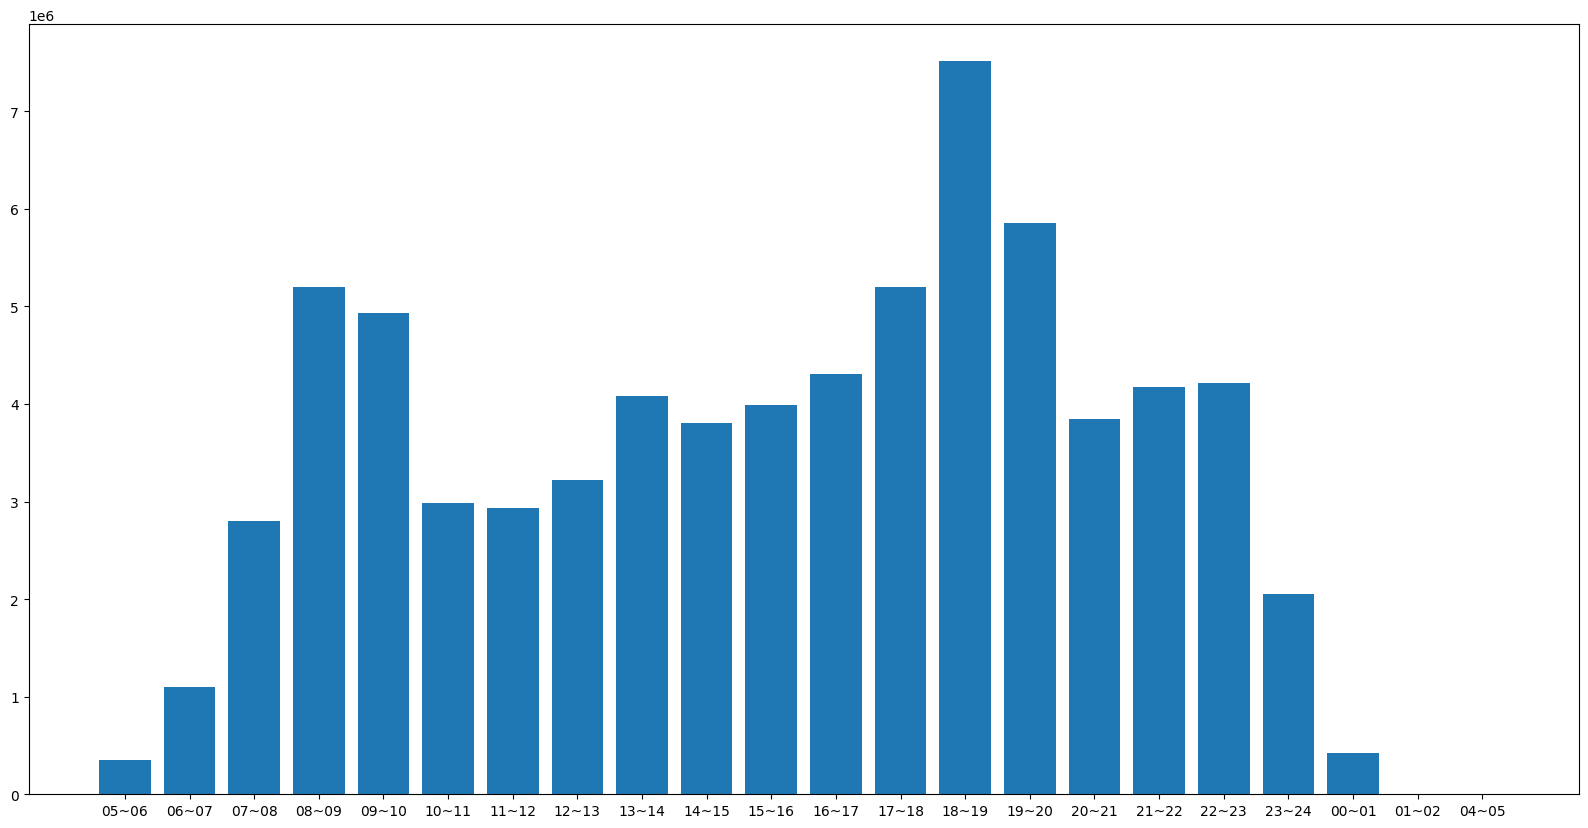

In [894]:
plt.figure(figsize=[20,10])
plt.bar(index, count)
plt.xticks(index, time)
plt.show()